In [9]:
import warnings
warnings.filterwarnings("ignore")

# Introduction Concrete: https://en.wikipedia.org/wiki/Concrete
# cement: kg/m3 mixture
# slag: kg in a m3 mixture
# flyash: kg in a m3 mixture
# water: kg in a m3 mixture
# superplasticzer: kg in a m3 mixture
# coarseaggregate kg in a m3 mixture
# fineaggregate: kg in a m3 mixture
# age: in days
# csMPa: compressive strength in MPa

import pandas as pd
orig_data = pd.read_csv("./Concrete_Data_Yeh.csv")
orig_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
data = orig_data.copy()
data.shape

(1030, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [13]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


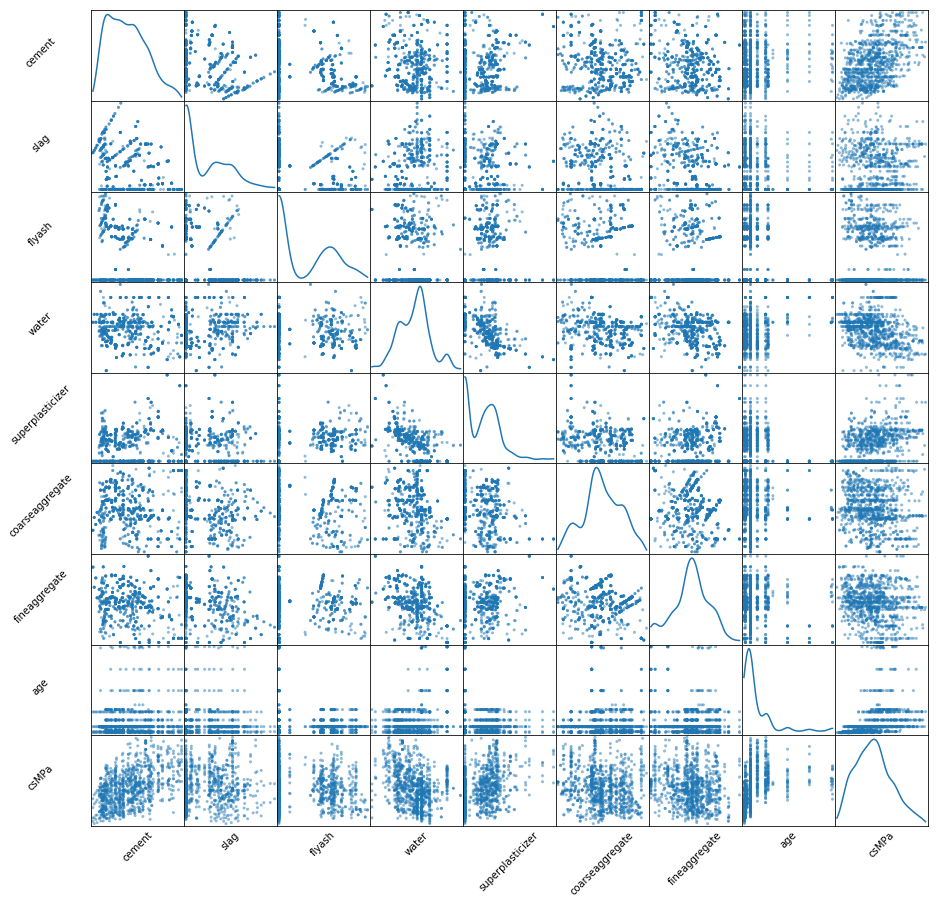

In [14]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
sm = scatter_matrix(data, figsize=(15,15), diagonal = 'kde')
#Changing label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]
#Changing offset for label
[s.get_yaxis().set_label_coords(-0.5,0.5) for s in sm.reshape(-1)]
#Hiding ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

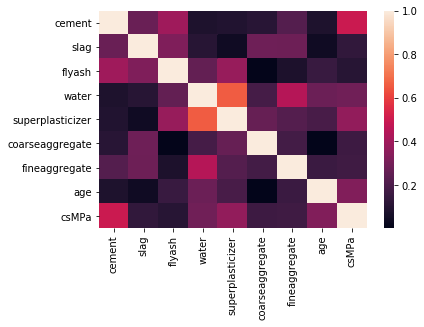

In [15]:
import seaborn as sns
sns.heatmap(data.corr().abs())
plt.show()

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
print(data.shape)

selected_data = data[['cement','water','superplasticizer','age','csMPa']]
selected_data = data[['cement','slag','water','coarseaggregate','fineaggregate','age','csMPa']]

print(selected_data.shape)

X_train, X_test, y_train, y_test = train_test_split(selected_data[selected_data.columns[:-1]],
                                                    selected_data[[selected_data.columns[-1]]],
                                                    test_size = 0.2,
                                                    random_state = 1)


(1030, 9)
(1030, 7)


In [201]:
# Scale the features
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                              columns = X_test.columns)
print(np.mean(X_train_scaled))
print(np.std(X_train_scaled))
print(np.mean(y_train))
X_train_scaled.head()
print(X_test_scaled.iloc[0])

cement            -3.745655e-17
slag               3.590709e-17
water             -1.935261e-15
coarseaggregate   -6.046943e-16
fineaggregate     -1.330516e-15
age               -3.557025e-17
dtype: float64
cement             1.0
slag               1.0
water              1.0
coarseaggregate    1.0
fineaggregate      1.0
age                1.0
dtype: float64
csMPa    35.407828
dtype: float64
cement             0.168847
slag              -0.836937
water             -0.320726
coarseaggregate    0.636927
fineaggregate     -0.298795
age               -0.687211
Name: 0, dtype: float64


In [202]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)
print(cv)
#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

KFold(n_splits=5, random_state=1, shuffle=False)


In [203]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.ensemble import RandomForestRegressor
from  sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

names = [ 'Gradient Boosting Regressor', 'ridge', 'lasso', 'LinearRegression', 'KNeighbors', 'DecisionTree', 'RandomForest0', 'AdaBoost']
models = [ GradientBoostingRegressor(), Ridge(), Lasso(), LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor()]

test = GradientBoostingRegressor()
test.fit(X_train_scaled, y_train)

def rmse(pred_y, y):
    return np.sqrt(np.mean((pred_y-y)**2))

pred_y = test.predict(X_test_scaled)
print(pred_y[0:5])
print(y_test[0:5])
print(test.feature_importances_)
#print(rmse(pred_y, y_test.values.flatten()))


# Set the parameters by cross-validation 
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4], 
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train_scaled, y_train)
    
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
print(evaluation)


[21.15331566 10.14000533 24.34546636 11.37438006 32.83326068]
     csMPa
339  21.91
244  19.93
882  36.44
567  11.96
923  39.84
[0.18702311 0.11792146 0.21482481 0.1524571  0.14890128 0.17887224]
FOLLOWING ARE THE TRAINING SCORES: 
                         Model       RMSE  R Squared
0  Gradient Boosting Regressor   5.272644   0.900462
1                        ridge  10.639200   0.596697
2                        lasso  11.037457   0.567022
3             LinearRegression  10.639365   0.596677
4                   KNeighbors   8.827616   0.721934
5                 DecisionTree   7.517439   0.794343
6                RandomForest0   5.897287   0.877032
7                     AdaBoost   7.739837   0.781724


In [230]:
#applying this model on test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns = X_test.columns)

pred = clf.predict(X_test_scaled)

clf = GradientBoostingRegressor(learning_rate=0.2, max_depth=10,
                                min_samples_split=150, n_estimators=200*2, 
                                random_state=1).fit(X_train_scaled, y_train)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(X_test_scaled))))
print("Test R^2: ", r2_score(y_test, clf.predict(X_test_scaled)))

Test RMSE:  4.3283502775025875
Test R^2:  0.928135766608649


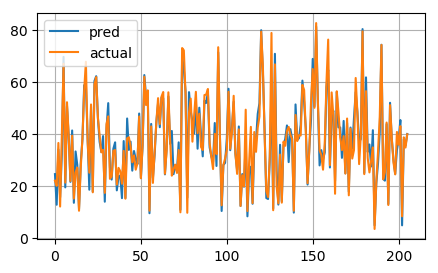

In [247]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
x = np.arange(0, len(pred))
ax.plot(x, pred, label="pred")
ax.plot(x, y_test, label="actual")
ax.legend()
plt.grid()
#plt.savefig("1a_rmse.pdf", format="pdf", bbox_inches="tight")
plt.show()
